## 데이터 불러오기

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import recipe
import db
import svd

In [ ]:
data = pd.read_csv('recipe.csv') #recipe raw 데이터 불러옴
data2 =  recipe.recipe_preprocessing(data) #레시피 전처리
data3 = recipe.split_ingredient(data2) #레시피 식재료 쪼개기
data4 = recipe.process_ingredient(data3) #레시피 식재료 패턴 처리

  0%|          | 0/74 [00:00<?, ?it/s]/content/drive/MyDrive/원/recipe/models/recipe.py:137: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  dataframe[unit_col_name] = np.where(dataframe[col_name].notna() & dataframe[col_name].str.contains(pattern, regex=True), replacement, dataframe[unit_col_name])
100%|██████████| 74/74 [05:30<00:00,  4.47s/it]


In [ ]:
data4

,recipe_title,recipe_ingredients,ingredient1,quantity1,unit1,ingredient2,quantity2,unit2,ingredient3,quantity3,...,unit71,ingredient72,quantity72,unit72,ingredient73,quantity73,unit73,ingredient74,quantity74,unit74
0,호박 새우젓찌개 만드는 방법~★,"{'재료': ['둥근호박1개', '청양고추3개', '당근약간', '실파약간', '새...",둥근호박,1,개,청양고추,3,개,당근,,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,바글바글 전복 된장찌개,"{'재료': ['된장1스푼', '전복'], '부재료와 양념': ['양파1/2개', ...",된장,1,스푼,전복,,None,양파,1/2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,순두부찌개....오도독 씹히는 미더덕이 들어간 순두부찌개!!,"{'재료': ['순두부(연두부)', '바지락30g', '미더덕30g', '멸치육수(...",순두부,,None,바지락,30,g,미더덕,30,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,정통 바지락 순두부 찌개,"{'주재료': ['순두부1봉', '바지락100g', '양파50g', '애호박10g'...",순두부,1,봉,바지락,100,g,양파,50,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,크림토마토 비프 스튜,"{'주재료': ['쇠고기등심250g', '파프리카1개', '양파1/3개', '마늘2...",쇠고기등심,250,g,파프리카,1,개,양파,1/3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166506,진리의 땅콩버터+바나나 조합! 살짝 구워 노릇노릇~바나나토스트,"{'필수 재료': ['바나나1개', '식빵2장', '땅콩버터3숟가락']}",바나나,1,개,식빵,2,장,땅콩버터,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
166507,간단한 머쉬마루버섯 매운탕,"{'재료': ['광어서더리탕1팩', '머쉬마루버섯150g', '양파1/2개', '무...",광어서더리탕,1,팩,머쉬마루버섯,150,g,양파,1/2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
166508,우도주막 독일식 굴라쉬 도전♡,"{'재료': ['한우소고기사태250g', '올리브유15ml', '파프리카2개', '...",한우소고기사태,250,g,올리브유,15,ml,파프리카,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
166509,우도주막 단호박 & 당근 스프 도전♡ (유태오),"{'재료': ['단호박1/2개', '제주당근1개', '양파1/2개', '버터10g'...",단호박,1/2,개,제주당근,1,개,양파,1/2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## unit24까지만 뽑아서 써도 되는 이유

In [ ]:
#식재료의 개수를 세보았을 때, 24개 정도만 추출을 해도 99.5%의 레시피가 남음 > 그래서 원데이터에서 식재료/양/단위 칼럼을 24까지만 뽑아서 사용할 것

24.0

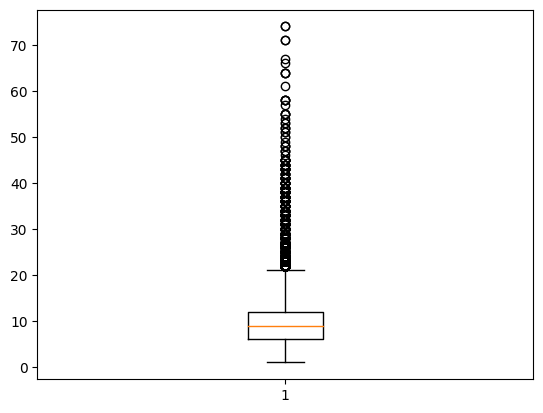

In [ ]:
column_names = [f'ingredient{i}' for i in range(1, 75)]
num_ingre = data4[column_names].count(axis = 1)
plt.boxplot(num_ingre)
np.quantile(num_ingre, 0.995)

## unit24까지만 사용하기 위해 뽑기

In [ ]:
#패턴을 가진 열만 선택하는 함수 (여러 개의 패턴 입력 가능)
def extract_columns_with_patterns(dataframe, patterns, num_columns):
    selected_columns = [f"{pattern}{i}" for i in range(1, num_columns) for pattern in patterns]
    result_df = dataframe[selected_columns]
    return result_df

#'ingredient', 'quantity', 'unit' 패턴의 열만 추출 (총 25개씩)
result_df = extract_columns_with_patterns(data4, ['ingredient', 'quantity', 'unit'], 25)
#'recipe_title'도 뽑아서 합치기
title = data4['recipe_title']
last = pd.concat([title, result_df], axis=1)
last

,recipe_title,ingredient1,quantity1,unit1,ingredient2,quantity2,unit2,ingredient3,quantity3,unit3,...,unit21,ingredient22,quantity22,unit22,ingredient23,quantity23,unit23,ingredient24,quantity24,unit24
0,호박 새우젓찌개 만드는 방법~★,둥근호박,1,개,청양고추,3,개,당근,,약간,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,바글바글 전복 된장찌개,된장,1,스푼,전복,,None,양파,1/2,개,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,순두부찌개....오도독 씹히는 미더덕이 들어간 순두부찌개!!,순두부,,None,바지락,30,g,미더덕,30,g,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,정통 바지락 순두부 찌개,순두부,1,봉,바지락,100,g,양파,50,g,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,크림토마토 비프 스튜,쇠고기등심,250,g,파프리카,1,개,양파,1/3,개,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166506,진리의 땅콩버터+바나나 조합! 살짝 구워 노릇노릇~바나나토스트,바나나,1,개,식빵,2,장,땅콩버터,3,숟가락,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
166507,간단한 머쉬마루버섯 매운탕,광어서더리탕,1,팩,머쉬마루버섯,150,g,양파,1/2,개,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
166508,우도주막 독일식 굴라쉬 도전♡,한우소고기사태,250,g,올리브유,15,ml,파프리카,2,개,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
166509,우도주막 단호박 & 당근 스프 도전♡ (유태오),단호박,1/2,개,제주당근,1,개,양파,1/2,개,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#DataFrame 형태로 식재료만 뽑기
column_names = [f'ingredient{i}' for i in range(1, 25)]
use = last[column_names]
use

,ingredient1,ingredient2,ingredient3,ingredient4,ingredient5,ingredient6,ingredient7,ingredient8,ingredient9,ingredient10,...,ingredient15,ingredient16,ingredient17,ingredient18,ingredient19,ingredient20,ingredient21,ingredient22,ingredient23,ingredient24
0,둥근호박,청양고추,당근,실파,새우젓,물,연두,소금,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,된장,전복,양파,둥근호박,감자,멸치or멸치간것,다진마늘,대파,두부작은것,청량고추,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,순두부,바지락,미더덕,멸치육수,고추기름,양파,애호박,파,달걀,마늘,...,청주,새우젓,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,순두부,바지락,양파,애호박,굵은고춧가루,다진마늘,대파,청양고추,홍고추,달걀,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,쇠고기등심,파프리카,양파,마늘,새송이버섯,방울토마토,치킨스톡,크림파스타소스,올리브유,소금,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166506,바나나,식빵,땅콩버터,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
166507,광어서더리탕,머쉬마루버섯,양파,무,대파,깻잎,양념소스,고추장,고추가루,쌈장,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
166508,한우소고기사태,올리브유,파프리카,양파,다진마늘,애호박,당근,감자,레드와인,데친완숙토마토,...,흑후추,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
166509,단호박,제주당근,양파,버터,볶은천일염,우유,생크림,파슬리,코코넛슈가,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## 식재료 뽑기

In [ ]:
#list 형태로 ingredient만 뽑아내기
ingre = []
for i in range(1, 25):
    ingre_lis = use[f'ingredient{i}'].to_list()
    ingre.extend(ingre_lis)
ingre

['둥근호박',
 '된장',
 '순두부',
 '순두부',
 '쇠고기등심',
 '돼지고기',
 '알래스카연어',
 '간돼지고기',
 '두부',
 '돼지고기',
 '돼지고기목살',
 '낙지',
 '닭가슴살',
 '낙지',
 '닭안심살',
 '물',
 '돼지고기목살',
 '돼지고기목살',
 '양파',
 '배추우거지',
 '애호박',
 '열무김치',
 '오징어',
 '생물주꾸미',
 '소고기다짐',
 '두부',
 '닭가슴살',
 '돼지고기앞다리',
 '두부',
 '돼지갈비',
 '청국장',
 '된장',
 '닭가슴살',
 '꾸미',
 '훈제오리고기',
 '감자',
 '두부',
 '소고기',
 '삼겹살',
 '청정원멸치국물내기티백',
 '햄',
 '콩나물',
 '조랭이떡',
 '돼지갈비',
 '감자큰거',
 '삼겹살',
 '호박',
 '돼지고기목살',
 '돼지고기',
 '순두부',
 '순두부',
 '청국장',
 '표고버섯',
 '통조림햄',
 '건표고버섯',
 '돼지고기잡채용',
 '당면',
 '동태',
 '감자',
 '된장',
 '고기불고기감',
 '돼지고기',
 '닭안심살',
 '양파',
 '돼지고기',
 '돼지고기',
 '파김치',
 '호박오가리',
 '소라',
 '돼지고기',
 '소고기',
 '돼지고기',
 '다시마',
 '돼지고기다짐육',
 '콩나물',
 '멸치',
 '소고기',
 '간돼지고기',
 '크래미',
 '두부',
 '돼지고기',
 '당면',
 '쌀뜨물',
 '신김치',
 '목살돼지고기',
 '닭',
 '찐찰옥수수',
 '파김치',
 '돼지고기안심',
 '두부',
 '콩국물',
 '아몬드',
 '양배추',
 '밥',
 '흙애서꿀고구마',
 '고구마',
 '달걀',
 '계란',
 '옥수수',
 '옥수수',
 '단호박',
 '문어',
 '떡볶이떡',
 '부추',
 '삶은소면',
 '백설자연재료부침가루',
 '백설쿠킷오꼬노미야끼KIT',
 '밥',
 '애호박',
 '바나나',
 '깻잎',
 '감자',
 '밥',
 '파래',
 '밥',
 '찹쌀가루',
 '두부

In [ ]:
len(ingre) #156918 * 24

3766032

In [ ]:
#count해서 df화
from collections import Counter
cnt = Counter(ingre)
df = pd.DataFrame.from_dict(cnt, orient='index', columns=['count']).reset_index()
#NaN값 날리기
nan_idx = df[df['index'].isnull()].index
df.drop(nan_idx, inplace=True)
df.sort_values(by='count', ascending=False) #내림차순 정렬

,index,count
698,소금,52521
13,양파,48906
305,설탕,48280
744,다진마늘,45994
1033,참기름,37997
...,...,...
23136,cj닭볶음탕양념,1
23137,무흰부분,1
23138,통조림햄스팸,1
23139,보일링크랩소스,1


In [ ]:
#식재료 nan값 검사
df[df['index'].isnull()]

,index,count


In [ ]:
#식재료 비어있는 값 검사 > 있긴 하지만 11번 나와서 50번 미만 날릴 때 어차피 날아감. 처리 당장 안 해도 괜찮다고 봄.
df[df['index']=='']

,index,count
22199,,11


## 50번 미만 나온 식재료들이 포함된 행을 제거하기 위한 작업

In [ ]:
#50 미만인 식재료들의 index(식재료명)만 뽑아내기
idx_50u = df[df['count'] < 50].sort_values(by='count', ascending=False)
find = idx_50u['index'].to_list()
len(find)

49872

In [ ]:
#성능 개선된 코드
import pandas as pd
from tqdm import tqdm

# 일치하는 값을 저장할 집합 초기화
all_matching_rows_set = set()

# find를 집합으로 변환
find_set = set(find)

# 10000개씩 그룹으로 나누어 처리
group_size = 10000
for i in tqdm(range(0, len(find), group_size)):
    subset_find = find[i:i + group_size]

    # 각 값을 하나씩 꺼내서 DataFrame과 비교 (벡터화된 연산 사용)
    matching_rows = use[use.isin(subset_find).any(axis=1)].index

    # 결과가 있다면 집합에 추가
    if not matching_rows.empty:
        all_matching_rows_set.update(matching_rows)

# 결과를 리스트로 변환
all_matching_rows = list(all_matching_rows_set)
len(all_matching_rows)

100%|██████████| 5/5 [00:01<00:00,  2.63it/s]


79771

In [ ]:
row_idx = list(set(last.index) - set(all_matching_rows)) #최종 리스트에 있는 행 인덱스들을 레시피 데이터의 행 인덱스 리스트에서 삭제
len(row_idx) #last - result (156918 - 79771)

77147

In [ ]:
minus50 = last.loc[row_idx].reset_index(drop=True) #삭제되어 77147개의 데이터만 남은 레시피 dataframe index 재설정
minus50

,recipe_title,ingredient1,quantity1,unit1,ingredient2,quantity2,unit2,ingredient3,quantity3,unit3,...,unit21,ingredient22,quantity22,unit22,ingredient23,quantity23,unit23,ingredient24,quantity24,unit24
0,호박 새우젓찌개 만드는 방법~★,둥근호박,1,개,청양고추,3,개,당근,,약간,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,깊은맛 나는 미역국 끓이는 방법,미역,1,줌,소고기국거리,150,g,다진마늘,2,큰술,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,순두부찌개....오도독 씹히는 미더덕이 들어간 순두부찌개!!,순두부,,None,바지락,30,g,미더덕,30,g,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,잡채 쉽게 만드는 방법,당면,10,인분,느타리버섯,1,팩,시금치,1,단,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,동래파전,부침가루,200,g,새우,10,마리,오징어,1,마리,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77142,"검은콩 콩국수, 여름별미 시원한 콩국수 만드는 법",검은콩,2,컵,소면,3~4,인분,오이,,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
77143,수요미식회 일본 쿠지라이식라면 만들기!!,라면,1,봉지,계란,1,개,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
77144,"총각김치,배추김치볶음(신김치)",신김치,1,그릇,설탕,3,밥숟갈,들기름,4,밥숟갈,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
77145,꽈리고추삼겹살볶음,삼겹살,300,g,꽈리고추,1,봉지,청양고추,2,개,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## 식재료가 3개 이하인 애들은 날림

In [ ]:
minus50[minus50['ingredient3'].isnull()] #식재료가 2개까지만 있는 레시피들

,recipe_title,ingredient1,quantity1,unit1,ingredient2,quantity2,unit2,ingredient3,quantity3,unit3,...,unit21,ingredient22,quantity22,unit22,ingredient23,quantity23,unit23,ingredient24,quantity24,unit24
66,마손질법 ☆ 이것이 바로 산에서 나는 장어!,마,,None,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
101,옥수수 찜기에 찌는법,옥수수,3,개,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
102,단호박 담백하고 맛있게 찌는방법,단호박,1,개,종이호일,1,장,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
119,에어프라이어 요리 단호박 찌는법 굽기,단호박,1,개,종이호일,1,장,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
259,딸기와 토마토가 만났어요 생과일주스,토마토,1,개,냉동딸기,5~6,개,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77080,북어포보관법 이렇게 보관하면 끝!,북어포,,None,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
77081,제철주꾸미는 요렇게♡주꾸미손질법,주꾸미,,None,밀가루,,None,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
77137,프랑크소시지로 만든 동물농장,프랑크소시지,,None,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
77138,늙은호박 오래오래 보관하고 먹어요! 늙은호박보관법,늙은호박,1,개,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
recipe_3 = minus50[minus50['ingredient4'].isnull()] #식재료가 3개까지만 있는 레시피들
recipe_3

,recipe_title,ingredient1,quantity1,unit1,ingredient2,quantity2,unit2,ingredient3,quantity3,unit3,...,unit21,ingredient22,quantity22,unit22,ingredient23,quantity23,unit23,ingredient24,quantity24,unit24
20,별미 중에 별미 열무김치찌개,열무김치,300,g,멸치,50,g,물,400,ml,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
33,바나나롤샌드위치 레시피!,식빵,2,장,바나나,1,개,딸기잼,1,T,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
66,마손질법 ☆ 이것이 바로 산에서 나는 장어!,마,,None,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
88,미세먼지 나가!!♡방풍나물 손질법,방풍나물,,None,물,1,리터,식초,1,숟가락,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
101,옥수수 찜기에 찌는법,옥수수,3,개,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77134,[달걀요리대전] 호박으로 만든 호박계란말이!!!,달걀,8,개,호박,1/4,개,대파,1/2,뿌리,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
77137,프랑크소시지로 만든 동물농장,프랑크소시지,,None,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
77138,늙은호박 오래오래 보관하고 먹어요! 늙은호박보관법,늙은호박,1,개,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
77143,수요미식회 일본 쿠지라이식라면 만들기!!,라면,1,봉지,계란,1,개,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
del_idx = list(set(minus50.index) - set(recipe_3.index)) #식재료가 3개까지만 있는 행 인덱스들을 레시피 데이터의 행 인덱스 리스트에서 삭제
len(del_idx) #minus50 - recipe_3 (77147 - 5495)

71652

In [ ]:
final = minus50.loc[del_idx].reset_index(drop=True) #71652개의 데이터만 남은 레시피 dataframe index 재설정
final

,recipe_title,ingredient1,quantity1,unit1,ingredient2,quantity2,unit2,ingredient3,quantity3,unit3,...,unit21,ingredient22,quantity22,unit22,ingredient23,quantity23,unit23,ingredient24,quantity24,unit24
0,호박 새우젓찌개 만드는 방법~★,둥근호박,1,개,청양고추,3,개,당근,,약간,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,깊은맛 나는 미역국 끓이는 방법,미역,1,줌,소고기국거리,150,g,다진마늘,2,큰술,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,순두부찌개....오도독 씹히는 미더덕이 들어간 순두부찌개!!,순두부,,None,바지락,30,g,미더덕,30,g,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,잡채 쉽게 만드는 방법,당면,10,인분,느타리버섯,1,팩,시금치,1,단,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,동래파전,부침가루,200,g,새우,10,마리,오징어,1,마리,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71647,도토리묵사발!!!,도토리묵,1,팩,계란,1,개,수박,4~5,조각,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
71648,새우계란볶음밥,당근,1,조각,양파,1/4,개,새우살,10,개,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
71649,"검은콩 콩국수, 여름별미 시원한 콩국수 만드는 법",검은콩,2,컵,소면,3~4,인분,오이,,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
71650,꽈리고추삼겹살볶음,삼겹살,300,g,꽈리고추,1,봉지,청양고추,2,개,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## dataframe 'final' 생성
#### 식재료 50번 이상만 나온 걸로 구성되고, 레시피별 식재료가 4개 이상인 것만 뽑은 dataframe (final.csv 생성 성공!!!)

In [ ]:
final

,recipe_title,ingredient1,quantity1,unit1,ingredient2,quantity2,unit2,ingredient3,quantity3,unit3,...,unit21,ingredient22,quantity22,unit22,ingredient23,quantity23,unit23,ingredient24,quantity24,unit24
0,호박 새우젓찌개 만드는 방법~★,둥근호박,1,개,청양고추,3,개,당근,,약간,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,깊은맛 나는 미역국 끓이는 방법,미역,1,줌,소고기국거리,150,g,다진마늘,2,큰술,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,순두부찌개....오도독 씹히는 미더덕이 들어간 순두부찌개!!,순두부,,None,바지락,30,g,미더덕,30,g,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,잡채 쉽게 만드는 방법,당면,10,인분,느타리버섯,1,팩,시금치,1,단,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,동래파전,부침가루,200,g,새우,10,마리,오징어,1,마리,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71647,도토리묵사발!!!,도토리묵,1,팩,계란,1,개,수박,4~5,조각,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
71648,새우계란볶음밥,당근,1,조각,양파,1/4,개,새우살,10,개,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
71649,"검은콩 콩국수, 여름별미 시원한 콩국수 만드는 법",검은콩,2,컵,소면,3~4,인분,오이,,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
71650,꽈리고추삼겹살볶음,삼겹살,300,g,꽈리고추,1,봉지,청양고추,2,개,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
import pandas as pd
from collections import Counter
from tqdm import tqdm

def process_data(final):
    i = 1
    while True:
        #'ingredient{i}' 열에서 식재료 추출 및 카운트
        ingre_list = []
        for j in tqdm(range(1, 25)):
            ingre_col = f'ingredient{j}'
            ingre_lis = final[ingre_col].to_list()
            ingre_list.extend(ingre_lis)

        #식재료 카운트 및 DataFrame 생성
        cnt = Counter(ingre_list)
        df = pd.DataFrame.from_dict(cnt, orient='index', columns=['count']).reset_index()

        #NaN값 제거
        nan_idx = df[df['index'].isnull()].index
        df.drop(nan_idx, inplace=True)

        #카운트 기준으로 내림차순 정렬
        df = df.sort_values(by='count', ascending=False)

        #카운트가 50 미만인 식재료 추출
        down_50 = df[df['count'] < 50].sort_values(by='count', ascending=False)

        #카운트가 50 미만인 식재료가 없으면 반복문 종료
        if len(down_50) == 0:
            break

        #카운트가 50 미만인 식재료의 리스트 가져오기
        idx_50d = down_50['index'].to_list()

        #일치하는 행 찾아서 집합 업데이트
        all_matching_rows_set = set()
        for j in tqdm(range(1, 25)):
            col_name = f'ingredient{j}'
            matching_rows = final[final[col_name].isin(idx_50d)].index.tolist()
            if matching_rows:
                all_matching_rows_set.update(matching_rows)

        #일치하는 행의 리스트 가져오기
        all_matching_rows = list(all_matching_rows_set)

        #일치하는 행을 제외한 인덱스 업데이트
        final_idx = list(set(final.index) - set(all_matching_rows))

        #최종 DataFrame 업데이트
        final = final.loc[final_idx].reset_index(drop=True)

        #다음 반복을 위해 i 증가
        i += 1

    return final

final_result = process_data(final)
final_result
#실제로 직접 반복작업을 해보았을 때 7번 정도 이 반복해야 모든 식재료들이 50번 이상 나온 것들로만 구성되게 됨 > 이걸 함수형으로 간략화한 것

100%|██████████| 24/24 [00:00<00:00, 521.00it/s]


,recipe_title,ingredient1,quantity1,unit1,ingredient2,quantity2,unit2,ingredient3,quantity3,unit3,...,unit21,ingredient22,quantity22,unit22,ingredient23,quantity23,unit23,ingredient24,quantity24,unit24
0,호박 새우젓찌개 만드는 방법~★,둥근호박,1,개,청양고추,3,개,당근,,약간,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,깊은맛 나는 미역국 끓이는 방법,미역,1,줌,소고기국거리,150,g,다진마늘,2,큰술,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,잡채 쉽게 만드는 방법,당면,10,인분,느타리버섯,1,팩,시금치,1,단,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,동래파전,부침가루,200,g,새우,10,마리,오징어,1,마리,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,제육볶음 맛있게 만드는 법,돼지고기,1,근,양파,,None,대파,,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51488,국물떡볶이 만들기,떡볶이떡,,None,어묵,,None,연두순,,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
51489,사골 배추된장국,배추,1,포기,사골육수,,적당량,파,1,대,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
51490,새우계란볶음밥,당근,1,조각,양파,1/4,개,새우살,10,개,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
51491,"검은콩 콩국수, 여름별미 시원한 콩국수 만드는 법",검은콩,2,컵,소면,3~4,인분,오이,,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#list 형태로 ffinal df의 ingredient만 뽑아내기
ingre = []
for i in range(1, 25):
    ingre_lis = final_result[f'ingredient{i}'].to_list()
    ingre.extend(ingre_lis)
ingre

['둥근호박',
 '미역',
 '당면',
 '부침가루',
 '돼지고기',
 '꽁치통조림',
 '낙지',
 '낙지',
 '꽈리고추',
 '돼지고기목살',
 '돼지고기목살',
 '돼지고기',
 '감자',
 '오징어',
 '소고기',
 '소고기국거리',
 '고구마',
 '닭가슴살',
 '시금치',
 '두부',
 '떡',
 '된장',
 '닭가슴살',
 '오징어',
 '스팸',
 '두부',
 '소고기',
 '삼겹살',
 '햄',
 '돼지갈비',
 '감자',
 '호박',
 '돼지고기목살',
 '냉동만두',
 '청국장',
 '우엉',
 '소고기',
 '대패삼겹살',
 '떡국떡',
 '당면',
 '동태',
 '감자',
 '된장',
 '돼지고기',
 '김치',
 '양파',
 '돼지고기',
 '베이컨',
 '베이컨',
 '돼지고기',
 '돈까스',
 '어묵',
 '다시마',
 '돼지고기다짐육',
 '콩나물',
 '멸치',
 '소고기',
 '쇠고기',
 '쑥',
 '순두부',
 '돼지고기',
 '돼지고기',
 '신김치',
 '불린쌀',
 '잔멸치',
 '애호박',
 '오징어',
 '밥',
 '당면',
 '달걀',
 '문어',
 '마늘종',
 '연근',
 '묵은지',
 '김밥용김',
 '밥',
 '애호박',
 '바나나',
 '깻잎',
 '감자',
 '밥',
 '찹쌀가루',
 '꽈리고추',
 '당근',
 '감자',
 '매생이',
 '밀떡',
 '묵은지',
 '아욱',
 '김치',
 '당면',
 '파래',
 '느타리버섯',
 '김치',
 '떡볶이떡',
 '베이컨',
 '닭다리살',
 '김치',
 '남은치킨',
 '닭',
 '감자전분',
 '고구마',
 '오이',
 '꽈리고추',
 '무',
 '오징어',
 '닭봉',
 '피자치즈',
 '소고기',
 '미역',
 '된장',
 '주꾸미',
 '대패삼겹살',
 '부추',
 '계란',
 '동태포',
 '복숭아',
 '방울토마토',
 '방울토마토',
 '옥수수통조림',
 '어묵',
 '콘옥수수',
 '딸기',
 '가지',
 '쥐포',
 '신김치'

In [ ]:
#count해서 df화
from collections import Counter
cnt = Counter(ingre)
df = pd.DataFrame.from_dict(cnt, orient='index', columns=['count']).reset_index()
#NaN값 날리기
nan_idx = df[df['index'].isnull()].index
df.drop(nan_idx, inplace=True)
df.sort_values(by='count', ascending=False) #내림차순 정렬

,index,count
284,다진마늘,18764
31,양파,18406
387,설탕,18187
290,소금,18138
321,참기름,15687
...,...,...
379,백오이,50
624,마늘다진것,50
471,요거트,50
318,메밀면,50


In [ ]:
down50 = df[df['count'] < 50].sort_values(by='count', ascending=False)
down50
# 50번 미만인 애들

,index,count


In [ ]:
final_result.to_csv("final.csv", index=False) #식재료 50번 이상만 나온 걸로 구성되고, 레시피별 식재료가 4개 이상인 것만 뽑은 dataframe

## Ingredient 분석 (원래 데이터의 ~unit4)

In [ ]:
#ingredient만 뽑아내기
ingred = []
for i in range(1, 25):
    ingre_lis = last[f'ingredient{i}'].to_list()
    ingred.extend(ingre_lis)
ingred

['둥근호박',
 '된장',
 '순두부',
 '순두부',
 '쇠고기등심',
 '돼지고기',
 '알래스카연어',
 '간돼지고기',
 '두부',
 '돼지고기',
 '돼지고기목살',
 '낙지',
 '닭가슴살',
 '낙지',
 '닭안심살',
 '물',
 '돼지고기목살',
 '돼지고기목살',
 '양파',
 '배추우거지',
 '애호박',
 '열무김치',
 '오징어',
 '생물주꾸미',
 '소고기다짐',
 '두부',
 '닭가슴살',
 '돼지고기앞다리',
 '두부',
 '돼지갈비',
 '청국장',
 '된장',
 '닭가슴살',
 '꾸미',
 '훈제오리고기',
 '감자',
 '두부',
 '소고기',
 '삼겹살',
 '청정원멸치국물내기티백',
 '햄',
 '콩나물',
 '조랭이떡',
 '돼지갈비',
 '감자큰거',
 '삼겹살',
 '호박',
 '돼지고기목살',
 '돼지고기',
 '순두부',
 '순두부',
 '청국장',
 '표고버섯',
 '통조림햄',
 '건표고버섯',
 '돼지고기잡채용',
 '당면',
 '동태',
 '감자',
 '된장',
 '고기불고기감',
 '돼지고기',
 '닭안심살',
 '양파',
 '돼지고기',
 '돼지고기',
 '파김치',
 '호박오가리',
 '소라',
 '돼지고기',
 '소고기',
 '돼지고기',
 '다시마',
 '돼지고기다짐육',
 '콩나물',
 '멸치',
 '소고기',
 '간돼지고기',
 '크래미',
 '두부',
 '돼지고기',
 '당면',
 '쌀뜨물',
 '신김치',
 '목살돼지고기',
 '닭',
 '찐찰옥수수',
 '파김치',
 '돼지고기안심',
 '두부',
 '콩국물',
 '아몬드',
 '양배추',
 '밥',
 '흙애서꿀고구마',
 '고구마',
 '달걀',
 '계란',
 '옥수수',
 '옥수수',
 '단호박',
 '문어',
 '떡볶이떡',
 '부추',
 '삶은소면',
 '백설자연재료부침가루',
 '백설쿠킷오꼬노미야끼KIT',
 '밥',
 '애호박',
 '바나나',
 '깻잎',
 '감자',
 '밥',
 '파래',
 '밥',
 '찹쌀가루',
 '두부

In [ ]:
len(ingred) #156918*24

3766032

In [ ]:
#count해서 df화 + NaN값 날리기
from collections import Counter
cnt = Counter(ingred)
df_ingred = pd.DataFrame.from_dict(cnt, orient='index', columns=['count']).reset_index()

nan_idx = df_ingred[df_ingred['index'].isnull()].index
df_ingred.drop(nan_idx, inplace=True)
df_ingred.sort_values(by='count', ascending=False) #내림차순 정렬

,index,count
698,소금,52521
13,양파,48906
305,설탕,48280
744,다진마늘,45994
1033,참기름,37997
...,...,...
23136,cj닭볶음탕양념,1
23137,무흰부분,1
23138,통조림햄스팸,1
23139,보일링크랩소스,1


In [ ]:
df_ingred[df_ingred['index'].isnull()]

,index,count


In [ ]:
df_ingred[df_ingred['count'] == 1]

,index,count
18,생물주꾸미,1
23,꾸미,1
28,청정원멸치국물내기티백,1
50,목살돼지고기,1
58,흙애서꿀고구마,1
...,...,...
51218,딸기쨈이나다른쨈,1
51219,포도씨유or올리브유,1
51220,레몬껍질소량,1
51221,갈릭드레싱,1


In [ ]:
df_ingred[df_ingred['count'] >= 50]
#40: 1560개, 30: 1858개, 20: 2422개, 10: 3956개, 5: 6749개, 4: 8224개, 3: 10778개, 2: 16696개

,index,count
0,둥근호박,126
1,된장,7445
2,순두부,888
4,돼지고기,3312
6,간돼지고기,237
...,...,...
29001,다시마가루,63
29479,소금기호에맞게,57
29516,부침유,82
29844,깻가루,64


In [ ]:
df_ingred['count'].sum()

1440172

In [ ]:
#                            SUM 값           비율
df1 = df_ingred[df_ingred['count'] >= 50] #1308552   0.9086081384723491
df2 = df_ingred[df_ingred['count'] >= 40] #1317884   0.9150879200539935
df3 = df_ingred[df_ingred['count'] >= 30] #1327953   0.9220794460661643
df4 = df_ingred[df_ingred['count'] >= 20] #1341556   0.9315248456434371
df5 = df_ingred[df_ingred['count'] >= 10] #1362192   0.945853689698175
df6 = df_ingred[df_ingred['count'] >= 5] #1380248    0.9583910810653172
df7 = df_ingred[df_ingred['count'] >= 4] #1386148    0.9624878139555553
df8 = df_ingred[df_ingred['count'] >= 3] #1393810    0.9678080118208103
df9 = df_ingred[df_ingred['count'] >= 2] #1405646    0.976026474615532
df10 = df_ingred[df_ingred['count'] >= 1] #1440172   1.0

In [ ]:
df10['count'].sum() / df_ingred['count'].sum()

1.0

## Ingredient 분석 (final.csv)

In [ ]:
load = pd.read_csv('final.csv') #최종 데이터 불러옴

<ipython-input-9-f109271b3455>:1: DtypeWarning: Columns (62,65,68,71) have mixed types. Specify dtype option on import or set low_memory=False.
  load = pd.read_csv('final.csv') #최종 데이터 불러옴


In [ ]:
load

,recipe_title,ingredient1,quantity1,unit1,ingredient2,quantity2,unit2,ingredient3,quantity3,unit3,...,unit21,ingredient22,quantity22,unit22,ingredient23,quantity23,unit23,ingredient24,quantity24,unit24
0,호박 새우젓찌개 만드는 방법~★,둥근호박,1,개,청양고추,3,개,당근,NaN,약간,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,깊은맛 나는 미역국 끓이는 방법,미역,1,줌,소고기국거리,150,g,다진마늘,2,큰술,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,잡채 쉽게 만드는 방법,당면,10,인분,느타리버섯,1,팩,시금치,1,단,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,동래파전,부침가루,200,g,새우,10,마리,오징어,1,마리,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,제육볶음 맛있게 만드는 법,돼지고기,1,근,양파,NaN,NaN,대파,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51488,국물떡볶이 만들기,떡볶이떡,NaN,NaN,어묵,NaN,NaN,연두순,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
51489,사골 배추된장국,배추,1,포기,사골육수,NaN,적당량,파,1,대,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
51490,새우계란볶음밥,당근,1,조각,양파,1/4,개,새우살,10,개,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
51491,"검은콩 콩국수, 여름별미 시원한 콩국수 만드는 법",검은콩,2,컵,소면,3~4,인분,오이,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#ingredient만 뽑아내기
ing = []
for i in range(1, 25):
    ing_lis = load[f'ingredient{i}'].to_list()
    ing.extend(ing_lis)
ing

['둥근호박',
 '미역',
 '당면',
 '부침가루',
 '돼지고기',
 '꽁치통조림',
 '낙지',
 '낙지',
 '꽈리고추',
 '돼지고기목살',
 '돼지고기목살',
 '돼지고기',
 '감자',
 '오징어',
 '소고기',
 '소고기국거리',
 '고구마',
 '닭가슴살',
 '시금치',
 '두부',
 '떡',
 '된장',
 '닭가슴살',
 '오징어',
 '스팸',
 '두부',
 '소고기',
 '삼겹살',
 '햄',
 '돼지갈비',
 '감자',
 '호박',
 '돼지고기목살',
 '냉동만두',
 '청국장',
 '우엉',
 '소고기',
 '대패삼겹살',
 '떡국떡',
 '당면',
 '동태',
 '감자',
 '된장',
 '돼지고기',
 '김치',
 '양파',
 '돼지고기',
 '베이컨',
 '베이컨',
 '돼지고기',
 '돈까스',
 '어묵',
 '다시마',
 '돼지고기다짐육',
 '콩나물',
 '멸치',
 '소고기',
 '쇠고기',
 '쑥',
 '순두부',
 '돼지고기',
 '돼지고기',
 '신김치',
 '불린쌀',
 '잔멸치',
 '애호박',
 '오징어',
 '밥',
 '당면',
 '달걀',
 '문어',
 '마늘종',
 '연근',
 '묵은지',
 '김밥용김',
 '밥',
 '애호박',
 '바나나',
 '깻잎',
 '감자',
 '밥',
 '찹쌀가루',
 '꽈리고추',
 '당근',
 '감자',
 '매생이',
 '밀떡',
 '묵은지',
 '아욱',
 '김치',
 '당면',
 '파래',
 '느타리버섯',
 '김치',
 '떡볶이떡',
 '베이컨',
 '닭다리살',
 '김치',
 '남은치킨',
 '닭',
 '감자전분',
 '고구마',
 '오이',
 '꽈리고추',
 '무',
 '오징어',
 '닭봉',
 '피자치즈',
 '소고기',
 '미역',
 '된장',
 '주꾸미',
 '대패삼겹살',
 '부추',
 '계란',
 '동태포',
 '복숭아',
 '방울토마토',
 '방울토마토',
 '옥수수통조림',
 '어묵',
 '콘옥수수',
 '딸기',
 '가지',
 '쥐포',
 '신김치'

In [ ]:
len(ing)

1235832

In [ ]:
#count해서 df화 + NaN값 날리기
from collections import Counter
cnt = Counter(ing)
df_ing = pd.DataFrame.from_dict(cnt, orient='index', columns=['count']).reset_index()

nan_idx = df_ing[df_ing['index'].isnull()].index
df_ing.drop(nan_idx, inplace=True)
df_ing.sort_values(by='count', ascending=False) #내림차순 정렬

,index,count
284,다진마늘,18764
31,양파,18406
387,설탕,18187
290,소금,18138
321,참기름,15687
...,...,...
379,백오이,50
624,마늘다진것,50
471,요거트,50
318,메밀면,50


In [ ]:
df_ing[df_ing['index'].isnull()]

,index,count


In [ ]:
df_ing[df_ing['count'] < 50]

,index,count


In [ ]:
df_ing['count'].sum()

459334

In [ ]:
df_ingred['count'].sum()

1440172

In [ ]:
df_ing['count'].sum() / df_ingred['count'].sum()

0.31894384837366646

## Quantity 분석 (원래 데이터의 ~unit24)

In [ ]:
#quantity만 뽑아내기
quant = []
for i in range(1, 25):
    data_q = last[f'quantity{i}'].to_list()
    quant.extend(data_q)
quant

['1',
 '1',
 '',
 '1',
 '250',
 '100',
 '1',
 '1',
 '2',
 '1',
 '',
 '1',
 '3',
 '',
 '5-6',
 '500',
 '600',
 '700',
 '1/4',
 '2',
 '1/3',
 '300',
 '2',
 '20',
 '1',
 '340',
 '300',
 '1',
 '1/2',
 '600',
 '1',
 '1+1/2',
 '1',
 '8',
 '300',
 '1',
 '',
 '100',
 '1+1/2',
 '1',
 '',
 '300',
 '350',
 '600',
 '1',
 '500',
 '1/3',
 '',
 '200',
 '',
 '1',
 '1',
 '7',
 '1/2',
 '1/4',
 '150',
 '500',
 '',
 '1',
 '',
 '300',
 '270',
 '3-4',
 '1',
 '600',
 '400',
 '',
 '100',
 '1',
 '150',
 '200',
 '',
 '',
 '150',
 '300',
 '400',
 '400',
 '200',
 '1',
 '1',
 '250',
 '250',
 '2.5',
 '',
 '250',
 '1',
 '2',
 '',
 '300',
 '1',
 '2',
 '2',
 '1',
 '1',
 '1',
 '200',
 '2',
 '8',
 '5',
 '3',
 '1',
 '1',
 '2',
 '1/5',
 '1',
 '100',
 '1',
 '1',
 '1',
 '2',
 '',
 '',
 '2',
 '170',
 '1',
 '1',
 '2/3',
 '1',
 '1',
 '',
 '',
 '1/8',
 '200',
 '3',
 '330',
 '100',
 '50',
 '1/2',
 '2',
 '',
 '250',
 '2',
 '1',
 '3',
 '',
 '1/2',
 '',
 '1',
 '',
 '1',
 '5',
 '3',
 '1/2',
 '1',
 '1',
 '',
 '1',
 '250',
 '2~3',
 '1

In [ ]:
from collections import Counter
import pandas as pd
quant_cnt = Counter(quant) #quantity 종류 및 등장 횟수 계산
quant_df = pd.DataFrame.from_dict(quant_cnt, orient='index', columns=['count']).reset_index()
quant_df

,index,count
0,1,394376
1,,309360
2,250,4142
3,100,18756
4,2,174648
...,...,...
1570,-1~2,1
1571,1680,1
1572,800-1000,1
1573,19-20,1


In [ ]:
#NaN값 처리
nan_idx = quant_df[quant_df['index'].isnull()].index
quant_df.drop(nan_idx, inplace=True)
quant_df

,index,count
0,1,394376
1,,309360
2,250,4142
3,100,18756
4,2,174648
...,...,...
1570,-1~2,1
1571,1680,1
1572,800-1000,1
1573,19-20,1


In [ ]:
quant_df.sort_values(by='count', ascending=False) #내림차순 정렬

,index,count
0,1,394376
1,,309360
4,2,174648
15,1/2,115093
5,3,71652
...,...,...
1119,133.6,1
613,1~5,1
612,22-23,1
608,500~800,1


In [ ]:
blank = quant_df[quant_df['index'] == ''] #인덱스가 빈칸인 경우
blank

,index,count
1,,309360


## Quantity 분석 (final.csv)

In [ ]:
#quantity만 뽑아내기
qua = []
for i in range(1, 25):
    data_q = load[f'quantity{i}'].to_list()
    qua.extend(data_q)
qua

['1',
 '1',
 '10',
 '200',
 '1',
 nan,
 '1',
 nan,
 '2',
 '600',
 '700',
 '300',
 '300',
 '2',
 '300',
 '300',
 '300',
 '300',
 '1',
 '1/2',
 '400',
 '1+1/2',
 '1',
 '1',
 '200',
 nan,
 '100',
 '600',
 nan,
 '600',
 '6',
 '1/3',
 nan,
 '8',
 '1',
 '2',
 '250',
 '4',
 nan,
 '500',
 nan,
 '1',
 nan,
 '270',
 '1',
 '1',
 '600',
 '1',
 nan,
 '150',
 '1',
 '200',
 nan,
 '150',
 '300',
 '400',
 '400',
 '200',
 '2',
 '1',
 '250',
 '300',
 nan,
 '1',
 '300',
 '1',
 '1',
 '1',
 '50',
 '2',
 '1',
 nan,
 '320',
 '8',
 '3',
 '1',
 '1',
 '2',
 nan,
 nan,
 '2',
 '1',
 '100',
 nan,
 nan,
 '200',
 '300',
 '100',
 '50',
 '1/2',
 '1',
 nan,
 '200',
 '250',
 '2',
 '9',
 '500',
 nan,
 nan,
 '1',
 '7',
 '1',
 '3',
 '200',
 '1/2',
 nan,
 '1',
 nan,
 '250',
 '30',
 '2',
 '5',
 nan,
 '120',
 '3',
 nan,
 '4',
 '30',
 '30',
 '1',
 '300',
 '1',
 '15',
 '3',
 '10',
 '1',
 '1/2',
 '100',
 '2',
 '2',
 '1/2',
 '50',
 '250',
 nan,
 '1/4',
 '420',
 '2/3',
 nan,
 '3',
 '1+1/2',
 '300',
 '1',
 nan,
 '100',
 '200',
 '2',

In [ ]:
from collections import Counter
import pandas as pd
qua_cnt = Counter(qua) #quantity 종류 및 등장 횟수 계산
qua_df = pd.DataFrame.from_dict(qua_cnt, orient='index', columns=['count']).reset_index()
qua_df

,index,count
0,1,135768
1,10,3892
2,200,4490
3,NaN,848119
4,2,57702
...,...,...
24172,NaN,1
24173,NaN,1
24174,NaN,1
24175,NaN,1


In [ ]:
#NaN값 처리
nan_idx = qua_df[qua_df['index'].isnull()].index
qua_df.drop(nan_idx, inplace=True)
qua_df.sort_values(by='count', ascending=False) #내림차순 정렬

,index,count
0,1,135768
4,2,57702
8,1/2,41176
22,3,23434
16,4,10426
...,...,...
489,930,1
486,1560,1
483,406,1
481,2.2/3,1


In [ ]:
blaank = qua_df[qua_df['index'] == ''] #인덱스가 빈칸인 경우
blaank

,index,count


## Unit 분석 (원래 데이터의 ~unit24)

In [ ]:
#unit만 뽑아내기
unit = []
for i in range(1, 25):
    data_u = last[f'unit{i}'].to_list()
    unit.extend(data_u)
unit

['개',
 '스푼',
 None,
 '봉',
 'g',
 'g',
 '개',
 '컵',
 '모',
 '근',
 None,
 '마리',
 '쪽',
 None,
 '쪽',
 'ml',
 'g',
 'g',
 '개',
 '컵',
 '개',
 'g',
 '마리',
 '마리',
 '쪽',
 'g',
 'g',
 'kg',
 '모',
 'g',
 '덩어리',
 'T',
 'Kg',
 '마리',
 'g',
 '개',
 None,
 'g',
 '근',
 '봉',
 None,
 'g',
 'g',
 'g',
 '개',
 '그램',
 '개',
 None,
 'g',
 None,
 '봉지',
 '팩',
 '개',
 '통',
 '컵',
 'g',
 'g',
 None,
 '개',
 None,
 'g',
 'g',
 '쪽',
 '개',
 'g',
 'g',
 None,
 'g',
 '웅큼',
 'g',
 'g',
 None,
 '조금',
 'g',
 'g',
 'g',
 'g',
 'g',
 '줄',
 '모',
 'g',
 'g',
 '종이컵',
 None,
 'g',
 '마리',
 '개',
 None,
 'g',
 '모',
 '가지적당량',
 '줌',
 '조각',
 '공기',
 '개',
 'g',
 '개',
 '개',
 '개',
 '개',
 '개',
 '마리',
 '줌',
 '단',
 '줌',
 'g',
 '개',
 '공기',
 '개',
 '개',
 None,
 None,
 '공기',
 'g',
 '공기',
 '컵',
 '모',
 '개',
 '개',
 None,
 None,
 '통',
 'g',
 '공기',
 'g',
 'g',
 'g',
 '종이컵',
 '쪽',
 None,
 'g',
 '컵',
 '개',
 '개',
 None,
 '모',
 None,
 '공기',
 None,
 '줌',
 '개',
 '개',
 '마리',
 '조금',
 'kg',
 None,
 '개',
 'g',
 '줌',
 '쪽',
 'g',
 None,
 '개',
 'g',
 '톡톡',
 '개',
 '개',


In [ ]:
from collections import Counter
import pandas as pd
unit_cnt = Counter(unit) #unit 종류 및 등장 횟수 계산
unit_df = pd.DataFrame.from_dict(unit_cnt, orient='index', columns=['count']).reset_index()
unit_df

,index,count
0,개,218468
1,스푼,51590
2,None,188589
3,봉,3338
4,g,135843
...,...,...
3838,t넣어체에걸러두기,1
3839,g굴소스,1
3840,센치한줌,1
3841,정도이상,1


In [ ]:
#NaN값 처리
nan_idx = unit_df[unit_df['index'].isnull()].index
unit_df.drop(nan_idx, inplace=True)
unit_df

,index,count
0,개,218468
1,스푼,51590
3,봉,3338
4,g,135843
5,컵,54723
...,...,...
3838,t넣어체에걸러두기,1
3839,g굴소스,1
3840,센치한줌,1
3841,정도이상,1


In [ ]:
unit_df.sort_values(by='count', ascending=False)

,index,count
0,개,218468
42,큰술,169521
4,g,135843
13,T,121518
94,약간,82732
...,...,...
1871,g대략,1
1873,큰술이안되게,1
1874,개의,1
1877,g섞은것,1


In [ ]:
unit_df[unit_df['count'] == 1]

,index,count
23,가지적당량,1
44,중력분,1
47,모또는원하는만큼,1
50,호사이즈한판,1
69,아몬드브리즈,1
...,...,...
3838,t넣어체에걸러두기,1
3839,g굴소스,1
3840,센치한줌,1
3841,정도이상,1


In [ ]:
unit_df[unit_df['count'] >= 2].sort_values(by='count', ascending=False)

,index,count
0,개,218468
42,큰술,169521
4,g,135843
13,T,121518
94,약간,82732
...,...,...
1498,노랑각,2
1496,진만큼,2
1495,인분가량,2
1485,뿌리이상,2


In [ ]:
uni = unit_df[unit_df['count'] >= 2]
uni['count'].sum() / unit_df['count'].sum()

0.9980057255491646

## Unit 분석 (final.csv)

In [ ]:
#unit만 뽑아내기
un = []
for i in range(1, 25):
    data_u = load[f'unit{i}'].to_list()
    un.extend(data_u)
un

['개',
 '줌',
 '인분',
 'g',
 '근',
 nan,
 '마리',
 nan,
 '봉지',
 'g',
 'g',
 'g',
 'g',
 '마리',
 'g',
 'g',
 'g',
 'g',
 '줌',
 '모',
 'g',
 'T',
 'Kg',
 '마리',
 'g',
 nan,
 'g',
 'g',
 nan,
 'g',
 '개',
 '개',
 nan,
 '개',
 '팩',
 '뿌리',
 'g',
 '인분',
 nan,
 'g',
 nan,
 '개',
 nan,
 'g',
 '쪽',
 '개',
 'g',
 '줌',
 '약간',
 'g',
 '장',
 'g',
 '조금',
 'g',
 'g',
 'g',
 'g',
 'g',
 '줌',
 '봉지',
 'g',
 'g',
 nan,
 '컵',
 'g정도',
 '개',
 '마리',
 '공기',
 'g',
 '개',
 '마리',
 nan,
 'g',
 '장',
 '장',
 '공기',
 '개',
 '개',
 nan,
 nan,
 '공기',
 '컵',
 'g',
 '적당량',
 nan,
 'g',
 'g',
 'g',
 'g',
 '종이컵',
 '줌',
 nan,
 'g',
 'g',
 '컵',
 '장',
 'g',
 nan,
 nan,
 '마리',
 'T',
 '조금',
 '개',
 'g',
 '개',
 nan,
 'kg',
 nan,
 'g',
 'g',
 'T',
 '마리',
 nan,
 'g',
 '알',
 nan,
 '개',
 '개',
 '개',
 '캔',
 'g',
 '캔',
 '개',
 '개',
 '장',
 '국그릇',
 '개',
 'g',
 '인분',
 '개',
 '개',
 'g',
 'g',
 '적당량',
 '통',
 'g',
 '공기',
 nan,
 '개',
 '컵',
 'g',
 '모',
 nan,
 'g',
 'g',
 '줌',
 '공기',
 'kg',
 'kg',
 '봉',
 '캔',
 '컵',
 '개',
 'g',
 nan,
 nan,
 '개',
 nan,
 '그램',
 '근',
 nan

In [ ]:
from collections import Counter
import pandas as pd
un_cnt = Counter(un) #unit 종류 및 등장 횟수 계산
un_df = pd.DataFrame.from_dict(un_cnt, orient='index', columns=['count']).reset_index()
un_df

,index,count
0,개,69608
1,줌,6499
2,인분,1241
3,g,30163
4,근,207
...,...,...
1251,개계란,1
1252,T소복히,1
1253,세,1
1254,양파즙,1


In [ ]:
#NaN값 처리
nan_idx = un_df[un_df['index'].isnull()].index
un_df.drop(nan_idx, inplace=True)
un_df.sort_values(by='count', ascending=False)

,index,count
0,개,69608
33,큰술,57303
9,T,49191
3,g,30163
14,약간,27107
...,...,...
747,춤큼,1
748,통마늘,1
284,ml감자,1
282,캔밥한공기,1


In [ ]:
un_df[un_df['count'] <= 2]

,index,count
38,장분량정도,1
40,모또는원하는만큼,1
42,호한마리,1
53,인치,2
57,큰국그릇,1
...,...,...
1251,개계란,1
1252,T소복히,1
1253,세,1
1254,양파즙,1


In [ ]:
un_df[un_df['count'] >= 5].sort_values(by='count', ascending=False)

,index,count
0,개,69608
33,큰술,57303
9,T,49191
3,g,30163
14,약간,27107
...,...,...
865,고집,5
811,ml등,5
796,번톡톡톡,5
803,우유,5


In [ ]:
uni = un_df[un_df['count'] >= 4]
uni['count'].sum() / un_df['count'].sum()

0.9969773812746658

## final.csv 양(quantity) 처리

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import recipe

In [ ]:
load = pd.read_csv('final.csv') #최종 데이터 불러옴
load

<ipython-input-6-6faff534323e>:1: DtypeWarning: Columns (62,65,68,71) have mixed types. Specify dtype option on import or set low_memory=False.
  load = pd.read_csv('final.csv') #최종 데이터 불러옴


,recipe_title,ingredient1,quantity1,unit1,ingredient2,quantity2,unit2,ingredient3,quantity3,unit3,...,unit21,ingredient22,quantity22,unit22,ingredient23,quantity23,unit23,ingredient24,quantity24,unit24
0,호박 새우젓찌개 만드는 방법~★,둥근호박,1,개,청양고추,3,개,당근,NaN,약간,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,깊은맛 나는 미역국 끓이는 방법,미역,1,줌,소고기국거리,150,g,다진마늘,2,큰술,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,잡채 쉽게 만드는 방법,당면,10,인분,느타리버섯,1,팩,시금치,1,단,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,동래파전,부침가루,200,g,새우,10,마리,오징어,1,마리,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,제육볶음 맛있게 만드는 법,돼지고기,1,근,양파,NaN,NaN,대파,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51488,국물떡볶이 만들기,떡볶이떡,NaN,NaN,어묵,NaN,NaN,연두순,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
51489,사골 배추된장국,배추,1,포기,사골육수,NaN,적당량,파,1,대,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
51490,새우계란볶음밥,당근,1,조각,양파,1/4,개,새우살,10,개,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
51491,"검은콩 콩국수, 여름별미 시원한 콩국수 만드는 법",검은콩,2,컵,소면,3~4,인분,오이,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
quantity = recipe.parse_quantity(load)
quantity

,recipe_title,ingredient1,quantity1,unit1,ingredient2,quantity2,unit2,ingredient3,quantity3,unit3,...,unit21,ingredient22,quantity22,unit22,ingredient23,quantity23,unit23,ingredient24,quantity24,unit24
0,호박 새우젓찌개 만드는 방법~★,둥근호박,1.0,개,청양고추,3.0,개,당근,1.0,약간,...,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,1.0,NaN
1,깊은맛 나는 미역국 끓이는 방법,미역,1.0,줌,소고기국거리,150.0,g,다진마늘,2.0,큰술,...,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,1.0,NaN
2,잡채 쉽게 만드는 방법,당면,10.0,인분,느타리버섯,1.0,팩,시금치,1.0,단,...,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,1.0,NaN
3,동래파전,부침가루,200.0,g,새우,10.0,마리,오징어,1.0,마리,...,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,1.0,NaN
4,제육볶음 맛있게 만드는 법,돼지고기,1.0,근,양파,1.0,NaN,대파,1.0,NaN,...,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,1.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51488,국물떡볶이 만들기,떡볶이떡,1.0,NaN,어묵,1.0,NaN,연두순,1.0,NaN,...,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,1.0,NaN
51489,사골 배추된장국,배추,1.0,포기,사골육수,1.0,적당량,파,1.0,대,...,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,1.0,NaN
51490,새우계란볶음밥,당근,1.0,조각,양파,1.0,개,새우살,10.0,개,...,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,1.0,NaN
51491,"검은콩 콩국수, 여름별미 시원한 콩국수 만드는 법",검은콩,2.0,컵,소면,3.5,인분,오이,1.0,NaN,...,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,1.0,NaN


In [ ]:
#quantity만 뽑아내기
qu = []
for i in range(1, 25):
    data_q = quantity[f'quantity{i}'].to_list()
    qu.extend(data_q)
qu

[1.0,
 1.0,
 10.0,
 200.0,
 1.0,
 1.0,
 1.0,
 1.0,
 2.0,
 600.0,
 700.0,
 300.0,
 300.0,
 2.0,
 300.0,
 300.0,
 300.0,
 300.0,
 1.0,
 1.0,
 400.0,
 1.0,
 1.0,
 1.0,
 200.0,
 1.0,
 100.0,
 600.0,
 1.0,
 600.0,
 6.0,
 1.0,
 1.0,
 8.0,
 1.0,
 2.0,
 250.0,
 4.0,
 1.0,
 500.0,
 1.0,
 1.0,
 1.0,
 270.0,
 1.0,
 1.0,
 600.0,
 1.0,
 1.0,
 150.0,
 1.0,
 200.0,
 1.0,
 150.0,
 300.0,
 400.0,
 400.0,
 200.0,
 2.0,
 1.0,
 250.0,
 300.0,
 1.0,
 1.0,
 300.0,
 1.0,
 1.0,
 1.0,
 50.0,
 2.0,
 1.0,
 1.0,
 320.0,
 8.0,
 3.0,
 1.0,
 1.0,
 2.0,
 1.0,
 1.0,
 2.0,
 1.0,
 100.0,
 1.0,
 1.0,
 200.0,
 300.0,
 100.0,
 50.0,
 1.0,
 1.0,
 1.0,
 200.0,
 250.0,
 2.0,
 9.0,
 500.0,
 1.0,
 1.0,
 1.0,
 7.0,
 1.0,
 3.0,
 200.0,
 1.0,
 1.0,
 1.0,
 1.0,
 250.0,
 30.0,
 2.0,
 5.0,
 1.0,
 120.0,
 3.0,
 1.0,
 4.0,
 30.0,
 30.0,
 1.0,
 300.0,
 1.0,
 15.0,
 3.0,
 10.0,
 1.0,
 1.0,
 100.0,
 2.0,
 2.0,
 1.0,
 50.0,
 250.0,
 1.0,
 1.0,
 420.0,
 1.0,
 1.0,
 3.0,
 1.0,
 300.0,
 1.0,
 1.0,
 100.0,
 200.0,
 2.0,
 1.0,
 1.0,
 1.0,
 1.0,

In [ ]:
from collections import Counter
import pandas as pd
qu_cnt = Counter(qu) #quantity 종류 및 등장 횟수 계산
qu_df = pd.DataFrame.from_dict(qu_cnt, orient='index', columns=['count']).reset_index()
qu_df

,index,count
0,1.000,1071348
1,10.000,3894
2,200.000,4490
3,2.000,57755
4,600.000,1080
...,...,...
463,0.850,1
464,177.000,1
465,6.250,1
466,960.000,1


In [ ]:
#NaN값 확인
nan_idx = qu_df[qu_df['index'].isnull()].index
nan_idx

Int64Index([], dtype='int64')

In [ ]:
blaank = qua_df[qua_df['index'] == ''] #인덱스가 빈칸인 경우
blaank

,index,count
